# Autoencoders
## Choosing Hyperparameters
You need to set 4 hyperparameters before training an autoencoder:

1. **Code size**: The code size or the size of the bottleneck is the most important hyperparameter used to tune the autoencoder. The bottleneck size decides how much the data has to be compressed. This can also act as a regularisation term.
2. **Number of layers**: Like all neural networks, an important hyperparameter to tune autoencoders is the depth of the encoder and the decoder. While a higher depth increases model complexity, a lower depth is faster to process.
3. **Number of nodes per layer**: The number of nodes per layer defines the weights we use per layer. Typically, the number of nodes decreases with each subsequent layer in the autoencoder as the input to each of these layers becomes smaller across the layers.
4. **Reconstruction Loss**: The loss function we use to train the autoencoder is highly dependent on the type of input and output we want the autoencoder to adapt to. If we are working with image data, the most popular loss functions for reconstruction are MSE Loss and L1 Loss. In case the inputs and outputs  are within the range [0,1], as in MNIST, we can also make use of Binary Cross Entropy as the reconstruction loss.

### Importing libraries

In [3]:
from random import randint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras import layers
from tensorflow import keras

### Loading dataset
#### A-Z Handwritten Alphabets
Single channel (black and wihite), row values [1:784] are pixel values of image. col [0] is label of handwritten letter

Source: [https://www.kaggle.com/sachinpatel21/az-handwritten-alphabets-in-csv-format](https://www.kaggle.com/sachinpatel21/az-handwritten-alphabets-in-csv-format)

In [4]:
alphabets_data = pd.read_csv('datasets/A_Z Handwritten Data.csv', header=None)

alphabets_data.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
36019,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
302775,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188892,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
308737,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147485,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
333921,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275908,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
227657,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239680,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
216092,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
alphabets_data.shape

(372451, 785)

In [6]:
alphabets_data = alphabets_data.sample(frac=0.05).reset_index(drop=True)

alphabets_data.shape

(18623, 785)

In [7]:
sorted(alphabets_data[0].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25]

### Creating lookup
Target values

In [8]:
lookup = { 0: 'A', 1: 'B', 2: 'C', 3: 'D', 
           4: 'E', 5: 'F', 6: 'G', 7: 'H', 
           8: 'I', 9: 'J',10: 'K', 11: 'L', 
          12: 'M', 13: 'N', 14: 'O', 15: 'P', 
          16: 'Q', 17: 'R', 18: 'S',19: 'T', 
          20: 'U', 21: 'V', 22: 'W', 23: 'X', 
          24: 'Y', 25: 'Z'}

In [9]:
# Split features from target (won't be using target to train autoencoder)
features = alphabets_data[alphabets_data.columns[1:]]

target = alphabets_data[0]

In [10]:
features.shape

(18623, 784)

In [11]:
 # Reshape image data to be 28x28 dimensions
features = features.values.reshape(len(features), 28, 28)

In [12]:
features.shape

(18623, 28, 28)

In [13]:
target.loc[10]

11

In [14]:
features[10][10:20]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  68, 195, 255,
        189,  66,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  26, 160, 246, 233,
        116,  12,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 153, 245, 255, 128,
         13,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  24, 102, 214, 255, 177,  55,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 116, 226, 255, 195,  65,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  92, 219, 255, 238, 108,  15,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

### Displaying image

In [15]:
def show_image(features, actual_label):
    
    print("Actual label: ", lookup[actual_label])
    plt.imshow(features, cmap='Greys')
    
    plt.show()

Actual label:  L


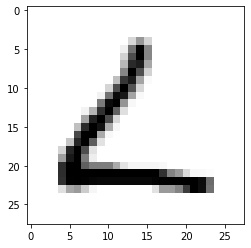

In [16]:
show_image(features[10], target[10])

Actual label:  U


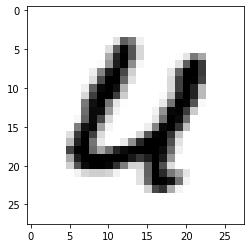

In [17]:
show_image(features[20], target[20])

#### Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255

In [18]:
features = features.astype(np.float32) / 255

In [19]:
features[10][10:20]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.26666668, 0.7647059 , 1.        , 0.7411765 , 0.25882354,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.10196079,
        0.627451  , 0.9647059 , 0.9137255 , 0.45490196, 0.04705882,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.6       ,
        0.9607843 , 1.        , 0.5019608 , 0.05098039, 0.        ,
        0.        , 0.    

### Splitting dataset into training and testing data

In [20]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(features,
                                                                        target,
                                                                        test_size=0.2)

In [21]:
train_images.shape

(14898, 28, 28)

In [22]:
test_images.shape

(3725, 28, 28)

### Bulilding stacked encoder
Linear fully connected layers

In [23]:
# First sequential model
stacked_encoder = tf.keras.models.Sequential([
    
    layers.Flatten(input_shape=[28, 28]),

    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    # last dense layer is the coding layer and holds latent features from input
    layers.Dense(16, activation="relu")
])

In [24]:
stacked_encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
Total params: 52,848
Trainable params: 52,848
Non-trainable params: 0
_________________________________________________________________


### Building stacked decoder
Mirror image of the encoder

In [25]:
# Second sequential model
stacked_decoder = tf.keras.models.Sequential([
    
    layers.Dense(32, activation="relu", input_shape=[16]),

    layers.Dense(64, activation="relu"),
    
    layers.Dense(28 * 28, activation="relu"),
                                           
    layers.Reshape([28, 28])
])

In [26]:
stacked_decoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               50960     
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 53,616
Trainable params: 53,616
Non-trainable params: 0
_________________________________________________________________


### Building autoencoder with encoder and decoder

In [27]:
# Sequential model that stacks encoder and decoder
ae_model = tf.keras.models.Sequential([stacked_encoder, stacked_decoder])

ae_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 16)                52848     
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28)            53616     
Total params: 106,464
Trainable params: 106,464
Non-trainable params: 0
_________________________________________________________________


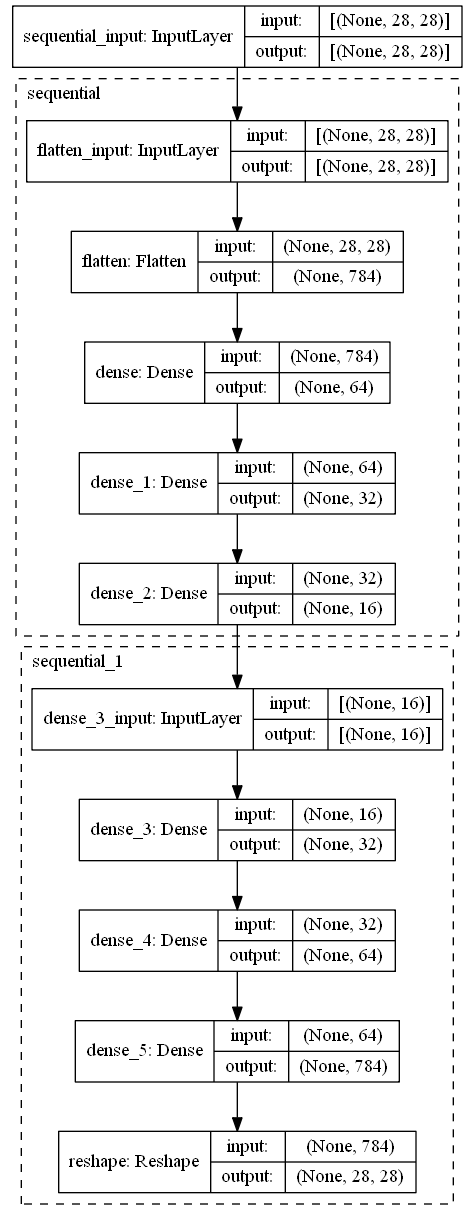

In [28]:
keras.utils.plot_model(ae_model, 
                        expand_nested=True, # expands nested sequential models in graphviz
                        show_shapes=True)

In [29]:
# frame as regression problem
ae_model.compile(loss='mean_squared_error',
                 optimizer=tf.keras.optimizers.RMSprop(), 
                 metrics=['mse'])

### Training autoencoder

In [30]:
training_hist = ae_model.fit(train_images, 
                             train_images, # labels are the training images themselves
                             epochs=20)

Epoch 1/20
466/466 [==============================] - 10s 3ms/step - loss: 0.0665 - mse: 0.0665
Epoch 2/20
466/466 [==============================] - 1s 3ms/step - loss: 0.0485 - mse: 0.0485
Epoch 3/20
466/466 [==============================] - 1s 3ms/step - loss: 0.0425 - mse: 0.0425
Epoch 4/20
466/466 [==============================] - 1s 3ms/step - loss: 0.0390 - mse: 0.0390
Epoch 5/20
466/466 [==============================] - 1s 3ms/step - loss: 0.0361 - mse: 0.0361
Epoch 6/20
466/466 [==============================] - 1s 3ms/step - loss: 0.0345 - mse: 0.0345
Epoch 7/20
466/466 [==============================] - 1s 3ms/step - loss: 0.0334 - mse: 0.0334
Epoch 8/20
466/466 [==============================] - 1s 3ms/step - loss: 0.0327 - mse: 0.0327
Epoch 9/20
466/466 [==============================] - 1s 3ms/step - loss: 0.0319 - mse: 0.0319
Epoch 10/20
466/466 [==============================] - 1s 3ms/step - loss: 0.0309 - mse: 0.0309
Epoch 11/20
466/466 [===========================

### Reconstructing image

In [31]:
def reconstruct_img(model, images, n_imgs):
    # select random sample of images
    random_int = randint(0, images.shape[0] - n_imgs)
    # generate reconstructions
    reconstructions = model.predict(images[random_int : random_int + n_imgs])
    # Plot original and reconstructed images
    fig = plt.figure(figsize=(n_imgs * 3, 3))
    
    for img_index in range(n_imgs):
        plt.subplot(2, n_imgs, 1 + img_index)
        plt.imshow(images[random_int + img_index], cmap='Greys')
        
        plt.subplot(2, n_imgs, 1 + n_imgs + img_index)
        plt.imshow(reconstructions[img_index], cmap='Greys')

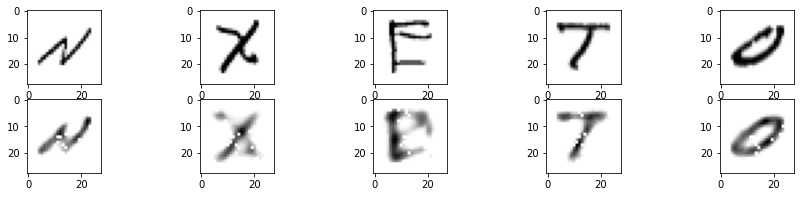

In [32]:
reconstruct_img(ae_model, test_images, 5)

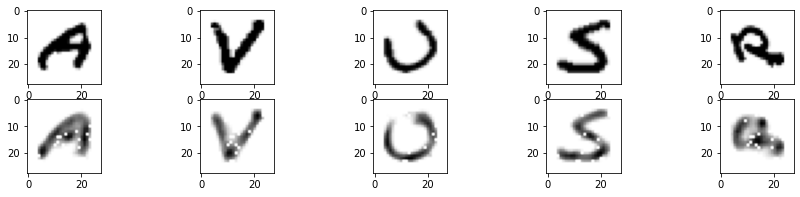

In [33]:
reconstruct_img(ae_model, test_images, 5)

### Building autoencoder using Convolutional layers
Encoder and decoder models are still sequential models, but include convolutional layers

[https://github.com/ageron/handson-ml2/blob/master/17_autoencoders_and_gans.ipynb](https://github.com/ageron/handson-ml2/blob/master/17_autoencoders_and_gans.ipynb)


In [34]:
conv_encoder = tf.keras.models.Sequential([
    # Reshape to satisfy convolution layers in TF expect shape (height, width, number of channels)
    layers.Reshape([28, 28, 1], input_shape=[28, 28]),      
    
    layers.Conv2D(16, kernel_size=3, padding="SAME", activation="relu"),
    layers.MaxPool2D(pool_size=2),
    
    layers.Conv2D(32, kernel_size=3, padding="SAME", activation="relu"),
    layers.MaxPool2D(pool_size=2),
    # coding layer
    layers.Conv2D(64, kernel_size=3, padding="SAME", activation="relu"),
    layers.MaxPool2D(pool_size=2)
])

In [35]:
conv_encoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)         

### Building decoder
Mirror image/inverse of encoder

In [36]:
conv_decoder = tf.keras.models.Sequential([

    layers.Conv2DTranspose(32, kernel_size=3, strides=2, 
                           padding="VALID", activation="relu",
                           input_shape=[3, 3, 64]),
    
    layers.Conv2DTranspose(16, kernel_size=3, strides=2, 
                           padding="SAME", activation="relu"),

    layers.Conv2DTranspose(1, kernel_size=3, strides=2, 
                           padding="SAME", activation="sigmoid"),
    
    layers.Reshape([28, 28])
])

In [37]:
conv_decoder.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose (Conv2DTran (None, 7, 7, 32)          18464     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 16)        4624      
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 1)         145       
_________________________________________________________________
reshape_2 (Reshape)          (None, 28, 28)            0         
Total params: 23,233
Trainable params: 23,233
Non-trainable params: 0
_________________________________________________________________


In [38]:
conv_ae_model = tf.keras.models.Sequential([conv_encoder, conv_decoder])

conv_ae_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 3, 3, 64)          23296     
_________________________________________________________________
sequential_4 (Sequential)    (None, 28, 28)            23233     
Total params: 46,529
Trainable params: 46,529
Non-trainable params: 0
_________________________________________________________________


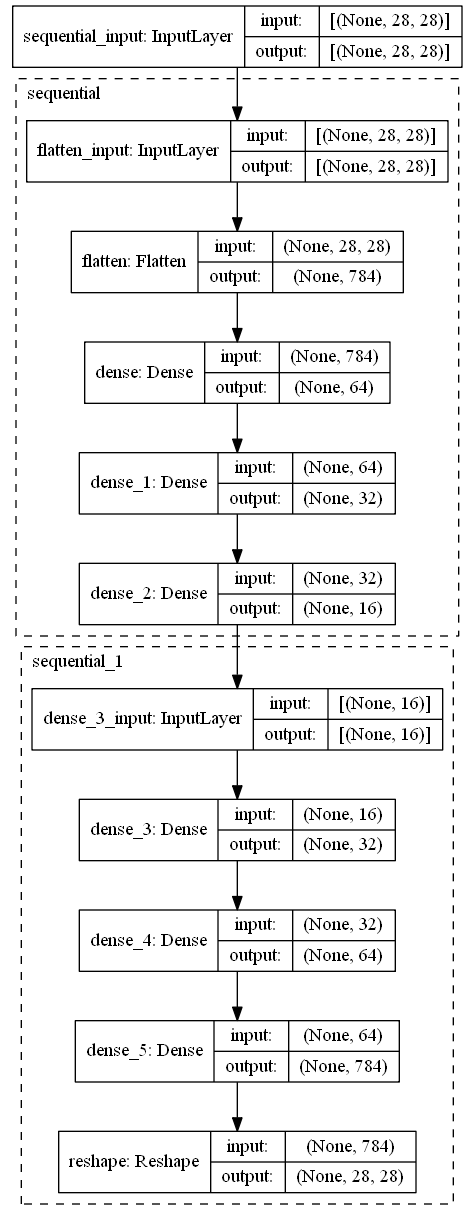

In [39]:
keras.utils.plot_model(ae_model, expand_nested=True, show_shapes=True)

In [40]:
# Frame as classification problem
conv_ae_model.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                      optimizer=tf.keras.optimizers.SGD(lr=1.0),
                      metrics=['accuracy'])

C:\Users\user\.conda\envs\py38\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


### Training autoencoder build by convolutional layers

In [41]:
training_hist_convAE = conv_ae_model.fit(train_images, train_images, epochs=10)

Epoch 1/10
466/466 [==============================] - 14s 26ms/step - loss: 0.3258 - accuracy: 0.1387
Epoch 2/10
466/466 [==============================] - 11s 24ms/step - loss: 0.1527 - accuracy: 0.3897
Epoch 3/10
466/466 [==============================] - 11s 23ms/step - loss: 0.1287 - accuracy: 0.4262
Epoch 4/10
466/466 [==============================] - 11s 24ms/step - loss: 0.1180 - accuracy: 0.4369
Epoch 5/10
466/466 [==============================] - 10s 22ms/step - loss: 0.1121 - accuracy: 0.4399
Epoch 6/10
466/466 [==============================] - 12s 26ms/step - loss: 0.1076 - accuracy: 0.4429
Epoch 7/10
466/466 [==============================] - 13s 28ms/step - loss: 0.1051 - accuracy: 0.4460
Epoch 8/10
466/466 [==============================] - 12s 25ms/step - loss: 0.1028 - accuracy: 0.4476
Epoch 9/10
466/466 [==============================] - 13s 28ms/step - loss: 0.1011 - accuracy: 0.4475
Epoch 10/10
466/466 [==============================] - 14s 30ms/step - loss: 0.099

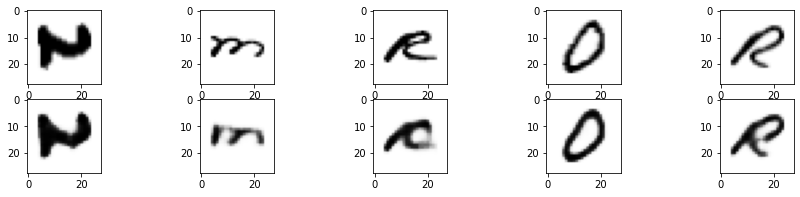

In [42]:
reconstruct_img(conv_ae_model, test_images, 5)

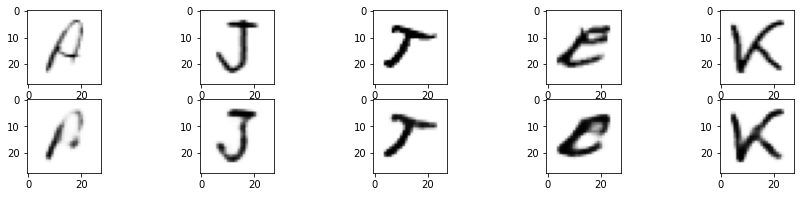

In [43]:
reconstruct_img(conv_ae_model, test_images, 5)